# Maman 14
Submitter: Shlomi Domnenko 318643640

My control system that I want to create is sun tracking system. 

Solar panels are on top of an actuator which moves, depending on the light sensetivity (which are measured from a light sensor, which is also the input of the system) from the sun. 

The more sunlight, the less the actuator has to correct itself (output).

In [2]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

# Defenition of the set points
The expected output of typical day

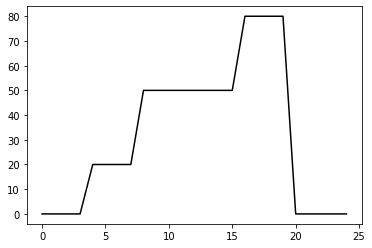

In [3]:
model = GEKKO()
time_steps = 24
steps = np.zeros(time_steps + 1)
steps[:] = 50

# Steps like graph
# steps[0:4] = 0
# steps[4:6] = 25
# steps[6:8] = 40
# steps[8:10] = 50
# steps[13:15] = 60
# steps[15:17] = 75 
# steps[17:19] = 90
# steps[19:] = 0

# Cleaner graph
steps[:4] = 0
steps[4:8] = 20
steps[12:14] = 50
steps[16:20] = 80
steps[20:] = 0

model.time = np.linspace(0, time_steps, time_steps+1)
set_point = model.Param(value=steps)
plt.plot(model.time, set_point.value, 'k-', label='SP')
plt.show()

The above set points are describing:

At the beginning of the day, the sun shines from east. The actuator is pointed in the extreme east (near zero).

When the time goes by, slowly, the actuator starts pointing to the middle.

In the middle of the day, the sun is directly above the actuator, so the expected output is 50 (which is pointed north, middle of east to west).

In the night, the sun in setting in the west, so the actuator points to the extreme west (near 100).

In the middle of the night, to setup for the next day, and because the lack of sunlight, the actuator points again to the extreme east (near zero).

In [4]:
output = model.Var (value = 0.0) # controller output
output_const = model.Const (value = 0.0) # controller output bias
process_variable = model.Var(value = 0.0) # process variable
err = model.Intermediate(set_point - process_variable) # set point error
err_intgl = model.Var(value = 0.0) # error integr

In [5]:
# Controller model
Kp = 15.0 # controller P gain
Ki = 2 # controller I gain
Kd = 1 # derivative constant
model.Equation(err_intgl.dt() == err) # error integral
model.Equation(output == output_const + Kp*err + Ki * err_intgl - Kd*process_variable.dt())

In [6]:
# Process model
Kprocess = 0.5 # process gain
tauP = 10.0 # process time constant
model.Equation(tauP * process_variable.dt() + process_variable == Kprocess*output)

In [7]:
model.options.IMODE=4
model.solve(disp=True)

apm 79.183.120.132_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            1
   Variables    :            4
   Intermediates:            1
   Connections  :            0
   Equations    :            4
   Residuals    :            3
 
 Number of state variables:            120
 Number of total equations: -          120
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains 

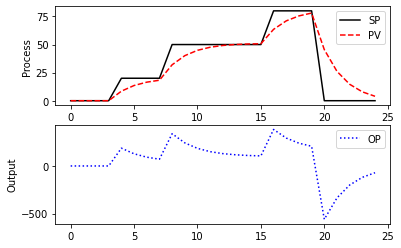

In [8]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(model.time, set_point.value, 'k-', label='SP')
plt.plot(model.time, process_variable.value,'r--',label='PV')
plt.xlabel('Time (sec)')
plt.ylabel('Process')
plt.legend()
plt.subplot(2,1,2)
plt.plot(model.time, output.value,'b:',label='OP')
plt.ylabel('Output')
plt.legend()
plt.show()

We can see that the process variable is matching the set points.

As the process variable is increasing, the output (or control) is also increasing (at the beginning, the error is big). And when the process variable is getting closer to the set points(less and less error), the PID controller satuares the control over the actuator, meaning, decrease of the output control.

If we play with the parameters Ki, Kp, Kd we get diffirent graph, as shown below.

# High Kp

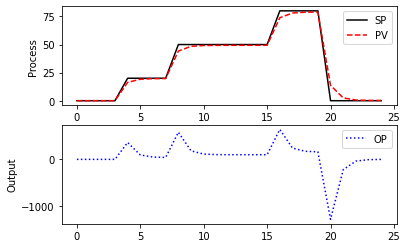

In [9]:
# Controller model
Kp = 100.0 # controller P gain
Ki = 2 # controller I gain
Kd = 1 # derivative constant

model = GEKKO()

# Steps
time_steps = 24
steps = np.zeros(time_steps + 1)
steps[:] = 50
steps[:4] = 0
steps[4:8] = 20
steps[12:14] = 50
steps[16:20] = 80
steps[20:] = 0

model.time = np.linspace(0, time_steps, time_steps+1)
set_point = model.Param(value=steps)

output = model.Var (value = 0.0) # controller output
output_const = model.Const (value = 0.0) # controller output bias
process_variable = model.Var(value = 0.0) # process variable
err = model.Intermediate(set_point - process_variable) # set point error
err_intgl = model.Var(value = 0.0) # error integr

model.Equation(err_intgl.dt() == err) # error integral
model.Equation(output == output_const + Kp*err + Ki * err_intgl - Kd*process_variable.dt())

# Process model
Kprocess = 0.5 # process gain
tauP = 10.0 # process time constant
model.Equation(tauP * process_variable.dt() + process_variable == Kprocess*output)

model.options.IMODE=4
model.solve(disp=False)

# Plot
plt.figure()
plt.subplot(2,1,1)
plt.plot(model.time, set_point.value, 'k-', label='SP')
plt.plot(model.time, process_variable.value,'r--',label='PV')
plt.xlabel('Time (sec)')
plt.ylabel('Process')
plt.legend()
plt.subplot(2,1,2)
plt.plot(model.time, output.value,'b:',label='OP')
plt.ylabel('Output')
plt.legend()
plt.show()


# Low Kp

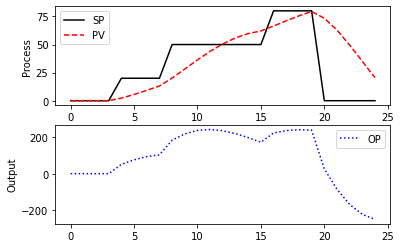

In [10]:
# Controller model
Kp = 1.0 # controller P gain
Ki = 2 # controller I gain
Kd = 1 # derivative constant

model = GEKKO()

# Steps
time_steps = 24
steps = np.zeros(time_steps + 1)
steps[:] = 50
steps[:4] = 0
steps[4:8] = 20
steps[12:14] = 50
steps[16:20] = 80
steps[20:] = 0

model.time = np.linspace(0, time_steps, time_steps+1)
set_point = model.Param(value=steps)

output = model.Var (value = 0.0) # controller output
output_const = model.Const (value = 0.0) # controller output bias
process_variable = model.Var(value = 0.0) # process variable
err = model.Intermediate(set_point - process_variable) # set point error
err_intgl = model.Var(value = 0.0) # error integr

model.Equation(err_intgl.dt() == err) # error integral
model.Equation(output == output_const + Kp*err + Ki * err_intgl - Kd*process_variable.dt())

# Process model
Kprocess = 0.5 # process gain
tauP = 10.0 # process time constant
model.Equation(tauP * process_variable.dt() + process_variable == Kprocess*output)

model.options.IMODE=4
model.solve(disp=False)

# Plot
plt.figure()
plt.subplot(2,1,1)
plt.plot(model.time, set_point.value, 'k-', label='SP')
plt.plot(model.time, process_variable.value,'r--',label='PV')
plt.xlabel('Time (sec)')
plt.ylabel('Process')
plt.legend()
plt.subplot(2,1,2)
plt.plot(model.time, output.value,'b:',label='OP')
plt.ylabel('Output')
plt.legend()
plt.show()


# Kp parameter experiment result

When the Kp paramter is high, as we already saw, the output is tighly coupled to the set points.

We idealy want this property.

But because of physical limitations, the actuator can't turn fast, as we can see at the time 20:00, when the pulse is to set the panels from pointing west to east.

Furthermore, we want to avoid the value of Kp to be small, as we can see in the second example. The output is almost not at all close to the set points. 

The proportional parameter is not enough, because of this limitations. We take a look at the integral parameter next.

# High Ki

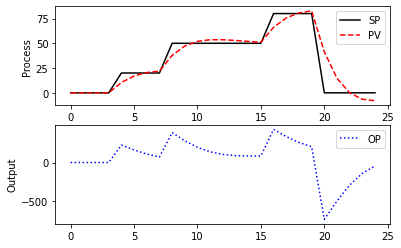

In [11]:
# Controller model
Kp = 15.0 # controller P gain
Ki = 10 # controller I gain
Kd = 1 # derivative constant

model = GEKKO()

# Steps
time_steps = 24
steps = np.zeros(time_steps + 1)
steps[:] = 50
steps[:4] = 0
steps[4:8] = 20
steps[12:14] = 50
steps[16:20] = 80
steps[20:] = 0

model.time = np.linspace(0, time_steps, time_steps+1)
set_point = model.Param(value=steps)

output = model.Var (value = 0.0) # controller output
output_const = model.Const (value = 0.0) # controller output bias
process_variable = model.Var(value = 0.0) # process variable
err = model.Intermediate(set_point - process_variable) # set point error
err_intgl = model.Var(value = 0.0) # error integr

model.Equation(err_intgl.dt() == err) # error integral
model.Equation(output == output_const + Kp*err + Ki * err_intgl - Kd*process_variable.dt())

# Process model
Kprocess = 0.5 # process gain
tauP = 10.0 # process time constant
model.Equation(tauP * process_variable.dt() + process_variable == Kprocess*output)

model.options.IMODE=4
model.solve(disp=False)

# Plot
plt.figure()
plt.subplot(2,1,1)
plt.plot(model.time, set_point.value, 'k-', label='SP')
plt.plot(model.time, process_variable.value,'r--',label='PV')
plt.xlabel('Time (sec)')
plt.ylabel('Process')
plt.legend()
plt.subplot(2,1,2)
plt.plot(model.time, output.value,'b:',label='OP')
plt.ylabel('Output')
plt.legend()
plt.show()


# Low Ki

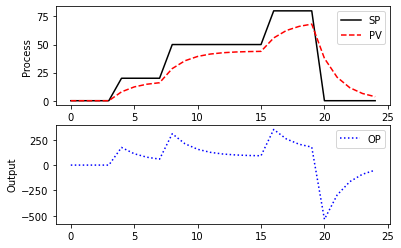

In [12]:
# Controller model
Kp = 15.0 # controller P gain
Ki = 0.01 # controller I gain
Kd = 1 # derivative constant

model = GEKKO()

# Steps
time_steps = 24
steps = np.zeros(time_steps + 1)
steps[:] = 50
steps[:4] = 0
steps[4:8] = 20
steps[12:14] = 50
steps[16:20] = 80
steps[20:] = 0

model.time = np.linspace(0, time_steps, time_steps+1)
set_point = model.Param(value=steps)

output = model.Var (value = 0.0) # controller output
output_const = model.Const (value = 0.0) # controller output bias
process_variable = model.Var(value = 0.0) # process variable
err = model.Intermediate(set_point - process_variable) # set point error
err_intgl = model.Var(value = 0.0) # error integr

model.Equation(err_intgl.dt() == err) # error integral
model.Equation(output == output_const + Kp*err + Ki * err_intgl - Kd*process_variable.dt())

# Process model
Kprocess = 0.5 # process gain
tauP = 10.0 # process time constant
model.Equation(tauP * process_variable.dt() + process_variable == Kprocess*output)

model.options.IMODE=4
model.solve(disp=False)

# Plot
plt.figure()
plt.subplot(2,1,1)
plt.plot(model.time, set_point.value, 'k-', label='SP')
plt.plot(model.time, process_variable.value,'r--',label='PV')
plt.xlabel('Time (sec)')
plt.ylabel('Process')
plt.legend()
plt.subplot(2,1,2)
plt.plot(model.time, output.value,'b:',label='OP')
plt.ylabel('Output')
plt.legend()
plt.show()


# Ki experiment results

We can see that the integral parameter tries to smooth out the transitions between the steady states.

Doing so with high value will result in overshoot (both in rising and falling edges).

Doing so with low value will result in undershoot (both in rising and falling edges).

The integral parameter helps in smoothing out physical constraints, such as 'moving at 50m/s for 1 second', which is almost impossible, and smooth this action over longer period of time.

This brings us to the final piece: the Kd parameter.

# High Kd

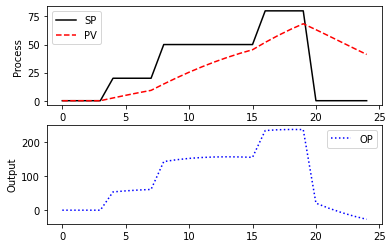

In [13]:
# Controller model
Kp = 15.0 # controller P gain
Ki = 2 # controller I gain
Kd = 100 # derivative constant

model = GEKKO()

# Steps
time_steps = 24
steps = np.zeros(time_steps + 1)
steps[:] = 50
steps[:4] = 0
steps[4:8] = 20
steps[12:14] = 50
steps[16:20] = 80
steps[20:] = 0

model.time = np.linspace(0, time_steps, time_steps+1)
set_point = model.Param(value=steps)

output = model.Var (value = 0.0) # controller output
output_const = model.Const (value = 0.0) # controller output bias
process_variable = model.Var(value = 0.0) # process variable
err = model.Intermediate(set_point - process_variable) # set point error
err_intgl = model.Var(value = 0.0) # error integr

model.Equation(err_intgl.dt() == err) # error integral
model.Equation(output == output_const + Kp*err + Ki * err_intgl - Kd*process_variable.dt())

# Process model
Kprocess = 0.5 # process gain
tauP = 10.0 # process time constant
model.Equation(tauP * process_variable.dt() + process_variable == Kprocess*output)

model.options.IMODE=4
model.solve(disp=False)

# Plot
plt.figure()
plt.subplot(2,1,1)
plt.plot(model.time, set_point.value, 'k-', label='SP')
plt.plot(model.time, process_variable.value,'r--',label='PV')
plt.xlabel('Time (sec)')
plt.ylabel('Process')
plt.legend()
plt.subplot(2,1,2)
plt.plot(model.time, output.value,'b:',label='OP')
plt.ylabel('Output')
plt.legend()
plt.show()


# Low Kd

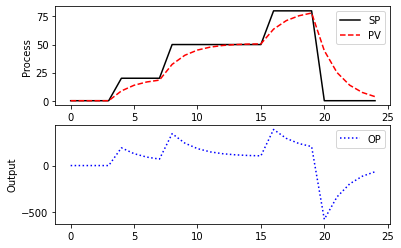

In [14]:
# Controller model
Kp = 15.0 # controller P gain
Ki = 2 # controller I gain
Kd = 0.01 # derivative constant

model = GEKKO()

# Steps
time_steps = 24
steps = np.zeros(time_steps + 1)
steps[:] = 50
steps[:4] = 0
steps[4:8] = 20
steps[12:14] = 50
steps[16:20] = 80
steps[20:] = 0

model.time = np.linspace(0, time_steps, time_steps+1)
set_point = model.Param(value=steps)

output = model.Var (value = 0.0) # controller output
output_const = model.Const (value = 0.0) # controller output bias
process_variable = model.Var(value = 0.0) # process variable
err = model.Intermediate(set_point - process_variable) # set point error
err_intgl = model.Var(value = 0.0) # error integr

model.Equation(err_intgl.dt() == err) # error integral
model.Equation(output == output_const + Kp*err + Ki * err_intgl - Kd*process_variable.dt())

# Process model
Kprocess = 0.5 # process gain
tauP = 10.0 # process time constant
model.Equation(tauP * process_variable.dt() + process_variable == Kprocess*output)

model.options.IMODE=4
model.solve(disp=False)

# Plot
plt.figure()
plt.subplot(2,1,1)
plt.plot(model.time, set_point.value, 'k-', label='SP')
plt.plot(model.time, process_variable.value,'r--',label='PV')
plt.xlabel('Time (sec)')
plt.ylabel('Process')
plt.legend()
plt.subplot(2,1,2)
plt.plot(model.time, output.value,'b:',label='OP')
plt.ylabel('Output')
plt.legend()
plt.show()


# Kd experiment results

As we can see, the output (or command control) with high Kd value results in a very fast response, and it almost matching the set points.

Low value of Kd results in output that is is less coupled to the set points.


# Experiment summary

We conclude that:

1) Kp is proportional of the error, added to the output.
2) Ki is the integral of the error, added to the output.
3) Kd is the derivative of the error, added to the output.

Usually, P controller is fine by itself. For example, when moving a slow moving car a low distance.

However, in the case of a drone, if we tell the P controller to move at 50m/s, it will reach the goal but will then start to fall back down because of gravity. At the next second, it reached 50-10 (9.8m/s gravity) so now it will calculate error of: (50-40) = 10m/s. It will happen again and again, never hovering at 50 meters from the ground, but jumping up and down from 50 to 40 and so on.

Another problem arises from using only P controller. If we tell the drone to fly at 25m/s (input) then it will stay there forever. This is called stable state error. To avoid this, we can use the I (integral) controller. This

By adding to the output the integral of the error, we can smooth out the transition between the steady states. We now can reach error 0. (which is the set point)

We essentially add the 'past' of the error to the output. We will later see that the D (derivative) controller is also adding the 'future' of the error.

"PI controller will get to the target, but the time to the target is not ideal".

Another problem: oscilation of the output around the setpoints:
<img src="Screen Shot 2022-01-18 at 23.24.47.png" >

If we add the integral, it can result in negative error, which is overshoot!

To avoid overshoot, we can use D controller.

PID sees this overshoot (future) and corrects it.

# 

# Parameter Turninig - Ziegler–Nichols method

Lets do this by hand. First we need to get a gain Ku such that the output oscilates constantly.

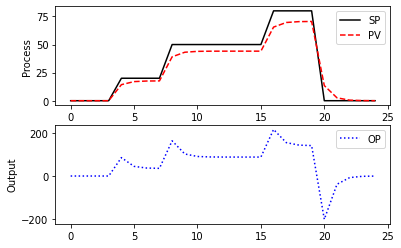

In [26]:
# Controller model
Kp = 15.0 # controller P gain
Ki = 0 # controller I gain
Kd = 0 # derivative constant

Kprocess = 0.5 # process gain
tauP = 2 # process time constant

model = GEKKO()

# Steps
time_steps = 24
steps = np.zeros(time_steps + 1)
steps[:] = 50
steps[:4] = 0
steps[4:8] = 20
steps[12:14] = 50
steps[16:20] = 80
steps[20:] = 0

model.time = np.linspace(0, time_steps, time_steps+1)
set_point = model.Param(value=steps)

output = model.Var (value = 0.0) # controller output
output_const = model.Const (value = 0.0) # controller output bias
process_variable = model.Var(value = 0.0) # process variable
err = model.Intermediate(set_point - process_variable) # set point error
err_intgl = model.Var(value = 0.0) # error integr

model.Equation(err_intgl.dt() == err) # error integral
model.Equation(output == output_const + Kp*err + Ki * err_intgl - Kd*process_variable.dt())

# Process model
model.Equation(tauP * process_variable.dt() + process_variable == Kprocess*output)

model.options.IMODE=4
model.solve(disp=False)

# Plot
plt.figure()
plt.subplot(2,1,1)
plt.plot(model.time, set_point.value, 'k-', label='SP')
plt.plot(model.time, process_variable.value,'r--',label='PV')
plt.xlabel('Time (sec)')
plt.ylabel('Process')
plt.legend()
plt.subplot(2,1,2)
plt.plot(model.time, output.value,'b:',label='OP')
plt.ylabel('Output')
plt.legend()
plt.show()
